In [1]:
import pandas as pd
dados = pd.read_csv('/content/Customer-Churn.csv')

In [2]:
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,Sim,Sim,24,Sim,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,Sim,ChequePapel,84.80,Nao
7039,0,Sim,Sim,72,Sim,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,Sim,CartaoDeCredito,103.20,Nao
7040,0,Sim,Sim,11,Nao,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.60,Nao
7041,1,Sim,Nao,4,Sim,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,74.40,Sim


In [3]:
dados.shape

(7043, 18)

In [7]:
traducao_dic = {
    'Sim': 1,
    'Nao': 0}

dadosmodificados = dados[['Conjuge', 'Dependentes','TelefoneFixo','PagamentoOnline', 'Churn']].replace(traducao_dic)

In [8]:
dadosmodificados

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn
0,1,0,0,1,0
1,0,0,1,0,0
2,0,0,1,1,1
3,0,0,0,0,0
4,0,0,1,1,1
...,...,...,...,...,...
7038,1,1,1,1,0
7039,1,1,1,1,0
7040,1,1,0,1,0
7041,1,0,1,1,1


In [12]:
dummie_dados = pd.get_dummies(dados.drop(['Conjuge', 'Dependentes', 'TelefoneFixo', 'PagamentoOnline', 'Churn'], axis=1))


dados_final = pd.concat([dadosmodificados, dummie_dados], axis=1)


In [20]:
# Supondo que seu DataFrame seja chamado 'dados_final'
dados_final.replace({True: 1, False: 0}, inplace=True)

In [21]:
dados_final

,Conjuge,Dependentes,TelefoneFixo,PagamentoOnline,Churn,Maior65Anos,MesesDeContrato,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,1,0,0,1,0,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,1,0,0,0,34,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,1,1,1,0,2,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,45,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,1,1,1,0,2,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,1,1,1,0,0,24,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,1,1,1,1,0,0,72,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,1,1,0,1,0,0,11,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,0,1,1,1,1,4,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [14]:
pd.set_option('display.max_columns', 39)

In [22]:
Xmaria = [[0,0,1,1,0,0,39.90,1,0,0,0,1,0,1,0,0,0,0,1,1,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,1]]

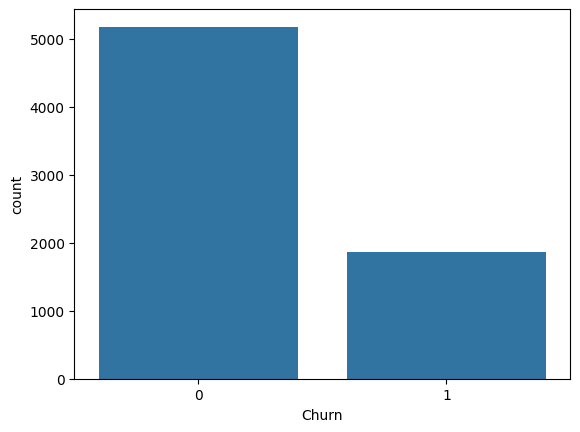

In [23]:
import seaborn as sns
%matplotlib inline

ax = sns.countplot(x='Churn', data=dados_final)

In [29]:
# Para podermos aplicar o SMOTE, devemos separar  os dados em variáveis características e resposta

X = dados_final.drop('Churn', axis = 1)
y = dados_final['Churn']

#from imblearn.over_sampling import SMOTE

#smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE
#X, y = smt.fit_resample(X, y)  # Realiza a reamostragem do conjunto de dados

In [32]:
#dados_final = pd.concat([X, y], axis=1)  # Concatena a variável target (y) com as features (X)

# Verifica se o balanceamento e a concatenação estão corretos.
#dados_final.head(2)

In [33]:
#ax = sns.countplot(x='Churn', data=dados_final)  # plotando a variável target balanceada.

In [31]:
from sklearn.preprocessing import StandardScaler
norm = StandardScaler()
X_normalizado = norm.fit_transform(X)
X_normalizado[0]

array([ 1.26542767, -0.52771004, -3.06083934,  0.81482091, -0.41318358,
       -1.10771815, -1.3217706 , -0.88447396,  3.18604176, -0.83366906,
        1.51268338, -1.04386816, -0.44617598,  0.86827317, -0.44617598,
       -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
       -0.44617598, -0.64211419,  0.87979784, -0.44617598, -0.52426638,
        1.18690873, -0.44617598, -0.77707385,  1.20311799, -0.44617598,
       -0.78976268, -0.44648735,  0.73788726, -0.41989297, -0.42576817,
        1.30373042, -0.47912706, -0.4360152 ])

In [34]:
Xmaria_normalizado = norm.transform(pd.DataFrame(Xmaria, columns = X.columns))

In [35]:
Xmaria_normalizado

array([[-0.79024667, -0.52771004,  0.32670777,  0.81482091, -0.41318358,
        -1.14938255, -0.97236043,  1.13061554, -0.31386908, -0.83366906,
        -0.66107688,  0.95797538, -0.44617598,  0.86827317, -0.44617598,
        -0.51721942, -0.95834643, -0.44617598,  1.57389661,  1.04285807,
         2.24126814, -0.64211419, -1.13662476,  2.24126814, -0.52426638,
         1.18690873, -0.44617598, -0.77707385, -0.83117367, -0.44617598,
         1.26620316, -0.44648735, -1.35522058,  2.38155929, -0.42576817,
        -0.76702973, -0.47912706,  2.293498  ]])

In [36]:
import numpy as np
a = Xmaria_normalizado
b = X_normalizado[0]

In [37]:
a - b

array([[-2.05567434,  0.        ,  3.38754711,  0.        ,  0.        ,
        -0.0416644 ,  0.34941017,  2.0150895 , -3.49991084,  0.        ,
        -2.17376025,  2.00184354,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         2.68744412,  0.        , -2.01642259,  2.68744412,  0.        ,
         0.        ,  0.        ,  0.        , -2.03429166,  0.        ,
         2.05596584,  0.        , -2.09310784,  2.80145225,  0.        ,
        -2.07076016,  0.        ,  2.72951321]])

In [38]:
np.square(a - b)

array([[4.22579699e+00, 0.00000000e+00, 1.14754754e+01, 0.00000000e+00,
        0.00000000e+00, 1.73592202e-03, 1.22087466e-01, 4.06058568e+00,
        1.22493759e+01, 0.00000000e+00, 4.72523363e+00, 4.00737757e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.22235589e+00, 0.00000000e+00, 4.06596007e+00, 7.22235589e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.13834258e+00, 0.00000000e+00, 4.22699553e+00, 0.00000000e+00,
        4.38110042e+00, 7.84813473e+00, 0.00000000e+00, 4.28804763e+00,
        0.00000000e+00, 7.45024235e+00]])

In [39]:
np.sum(np.square(a - b))

91.7112036526817

In [40]:
np.sqrt(91.7112036526817)

9.576596663360199

In [41]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X_normalizado, y, test_size=0.3, random_state=123)

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric='euclidean')
knn.fit(X_treino, y_treino)

KNeighborsClassifier(metric='euclidean')

In [43]:
predito_knn = knn.predict(X_teste)
predito_knn

array([1, 0, 0, ..., 0, 1, 1])

In [44]:
np.median(X_treino)

-0.4461759755508453

In [50]:
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB(binarize=0.00)

In [51]:
bnb.fit(X_treino, y_treino)

BernoulliNB()

In [52]:
predito_bnb = bnb.predict(X_teste)
predito_bnb

array([1, 0, 0, ..., 1, 1, 1])

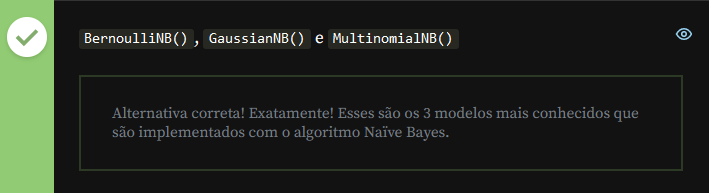

In [53]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(criterion='entropy', random_state=42)

dtc.fit(X_treino, y_treino)

DecisionTreeClassifier(criterion='entropy', random_state=42)

In [54]:
dtc.feature_importances_

array([0.02100894, 0.01395648, 0.0068095 , 0.01986065, 0.01886452,
       0.1627932 , 0.22212421, 0.00939177, 0.00344576, 0.01039829,
       0.0019815 , 0.03128648, 0.00065123, 0.00849934, 0.        ,
       0.01698366, 0.00622973, 0.        , 0.00964718, 0.01267467,
       0.00027769, 0.00770208, 0.01299062, 0.00368329, 0.02047256,
       0.00371587, 0.        , 0.00156955, 0.00671244, 0.0003825 ,
       0.01126638, 0.03622159, 0.16358635, 0.07445054, 0.01758995,
       0.02117825, 0.02183557, 0.01975766])

In [55]:
predito_ArvoreDecisao = dtc.predict(X_teste)
predito_ArvoreDecisao

array([0, 0, 0, ..., 1, 1, 1])

In [56]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_teste, predito_knn))

[[1242  327]
 [ 248 1288]]


In [57]:
print(confusion_matrix(y_teste, predito_bnb))

[[1091  478]
 [ 241 1295]]


In [58]:
print(confusion_matrix(y_teste, predito_ArvoreDecisao))

[[1250  319]
 [ 275 1261]]


In [59]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [62]:
print(accuracy_score(y_teste, predito_knn))

0.8148148148148148


In [63]:
print(accuracy_score(y_teste, predito_bnb))

0.768438003220612


In [64]:
print(accuracy_score(y_teste, predito_ArvoreDecisao))

0.808695652173913


In [65]:
print(precision_score(y_teste, predito_knn))

0.7975232198142415


In [66]:
print(precision_score(y_teste, predito_bnb))

0.730400451212634


In [67]:
print(precision_score(y_teste, predito_ArvoreDecisao))

0.7981012658227848


In [68]:
print(recall_score(y_teste, predito_knn))

0.8385416666666666


In [69]:
print(recall_score(y_teste, predito_bnb))

0.8430989583333334


In [70]:
print(recall_score(y_teste, predito_ArvoreDecisao))

0.8209635416666666


In [74]:
print('Modelo KNN:', precision_score(y_teste, predito_knn))
print('Modelo Bernoulli de Naive Bayes:', precision_score(y_teste, predito_bnb))
print('Modelo Àrvore de Decisão:', precision_score(y_teste, predito_ArvoreDecisao))

Modelo KNN: 0.7975232198142415
Modelo Bernoulli de Naive Bayes: 0.730400451212634
Modelo Àrvore de Decisão: 0.7981012658227848
